In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.table import Table

plt.style.use('/Users/ajl573/Repos/alexlyttle/cartography-styles/cartography-dark.mplstyle')

In [26]:
df = pd.read_csv('../modelling/final_models/population+sun_results/partial_pool/DR14_ASPC/population/stars/results.csv')
df.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC5950854,0.787223,0.870010,0.932191,1182.432590,1325.201967,1289.535691,3596.869825,0.695978,0.996358,...,18353.225517,18353.225517,13966.672871,-0.287445,-0.020236,0.000529,0.000374,-0.155726,1.000357,0.071685
1,KIC3942719,1.796417,1.837445,1.862172,1885.696329,1763.440489,1762.516388,3411.294100,1.752855,1.888088,...,4668.850338,4668.850338,7267.573509,-0.402963,-0.184656,0.000853,0.000603,-0.291168,1.001412,0.058293
2,KIC4457351,1.741225,1.796926,1.832285,1503.245478,1196.521278,1196.521278,1783.365241,1.681358,1.867983,...,21261.185858,19673.544135,13897.731433,-0.343261,-0.165847,0.000322,0.000237,-0.257974,1.000359,0.046989
3,KIC3223000,0.237187,0.364823,0.500833,1987.754912,2009.834951,2009.834951,3181.722850,0.131731,0.607467,...,11060.280968,11060.280968,12442.207612,-0.257526,-0.002148,0.000653,0.000462,-0.134466,1.000941,0.068677
4,KIC7429287,1.412570,1.509902,1.579870,1290.288463,1152.759789,1152.759789,2422.706692,1.318755,1.650847,...,14087.436520,12870.852520,11811.771543,-0.423542,-0.160516,0.000593,0.000439,-0.289075,1.000391,0.070383


In [43]:
colors = Table.read('star_colors.tex').to_pandas()
colors.head()

,T$_{\mathrm{eff}}$,$\log$(g),Z,RGB PHX,Hex PHX
0,2300,0.0,0.0,"1.0,0.744,0.652",\#ffbda6
1,2300,0.5,0.0,"1.0,0.752,0.72",\#ffbfb7
2,2300,1.0,0.0,"1.0,0.701,0.752",\#ffb2bf
3,2300,1.5,0.0,"1.0,0.689,0.586",\#ffaf95
4,2300,2.0,0.0,"1.0,0.63,0.33",\#ffa054


In [44]:
colors.columns

Index(['T$_{\mathrm{eff}}$', '$\log$(g)', 'Z', 'RGB PHX', 'Hex PHX'], dtype='object')

In [45]:
from scipy import interpolate

In [56]:
colors['RGB'] = colors['RGB PHX'].str.split(',')
rgb_cols = ['R', 'G', 'B']
colors[rgb_cols] = np.array(colors['RGB'].apply(lambda rgb: [float(c) for c in rgb]).to_list())
colors.head()

,T$_{\mathrm{eff}}$,$\log$(g),Z,RGB PHX,Hex PHX,RGB,R,G,B
0,2300,0.0,0.0,"1.0,0.744,0.652",\#ffbda6,"[1.0, 0.744, 0.652]",1.0,0.744,0.652
1,2300,0.5,0.0,"1.0,0.752,0.72",\#ffbfb7,"[1.0, 0.752, 0.72]",1.0,0.752,0.720
2,2300,1.0,0.0,"1.0,0.701,0.752",\#ffb2bf,"[1.0, 0.701, 0.752]",1.0,0.701,0.752
3,2300,1.5,0.0,"1.0,0.689,0.586",\#ffaf95,"[1.0, 0.689, 0.586]",1.0,0.689,0.586
4,2300,2.0,0.0,"1.0,0.63,0.33",\#ffa054,"[1.0, 0.63, 0.33]",1.0,0.630,0.330


In [79]:
x_cols = [r'T$_{\mathrm{eff}}$', r'$\log$(g)']

In [81]:
rgb_fns = {}
for col in rgb_cols:
    rgb_fns[col] = interpolate.NearestNDInterpolator(colors[x_cols], colors[col])

In [91]:
df['logg_50th'] = 4.44 + np.log10(df['mass_50th']) - 2*np.log10(df['rad_50th'])

In [100]:
star_cols = ['teff_50th', 'logg_50th']
for col, fn in rgb_fns.items():
    df[col] = fn(df[star_cols])

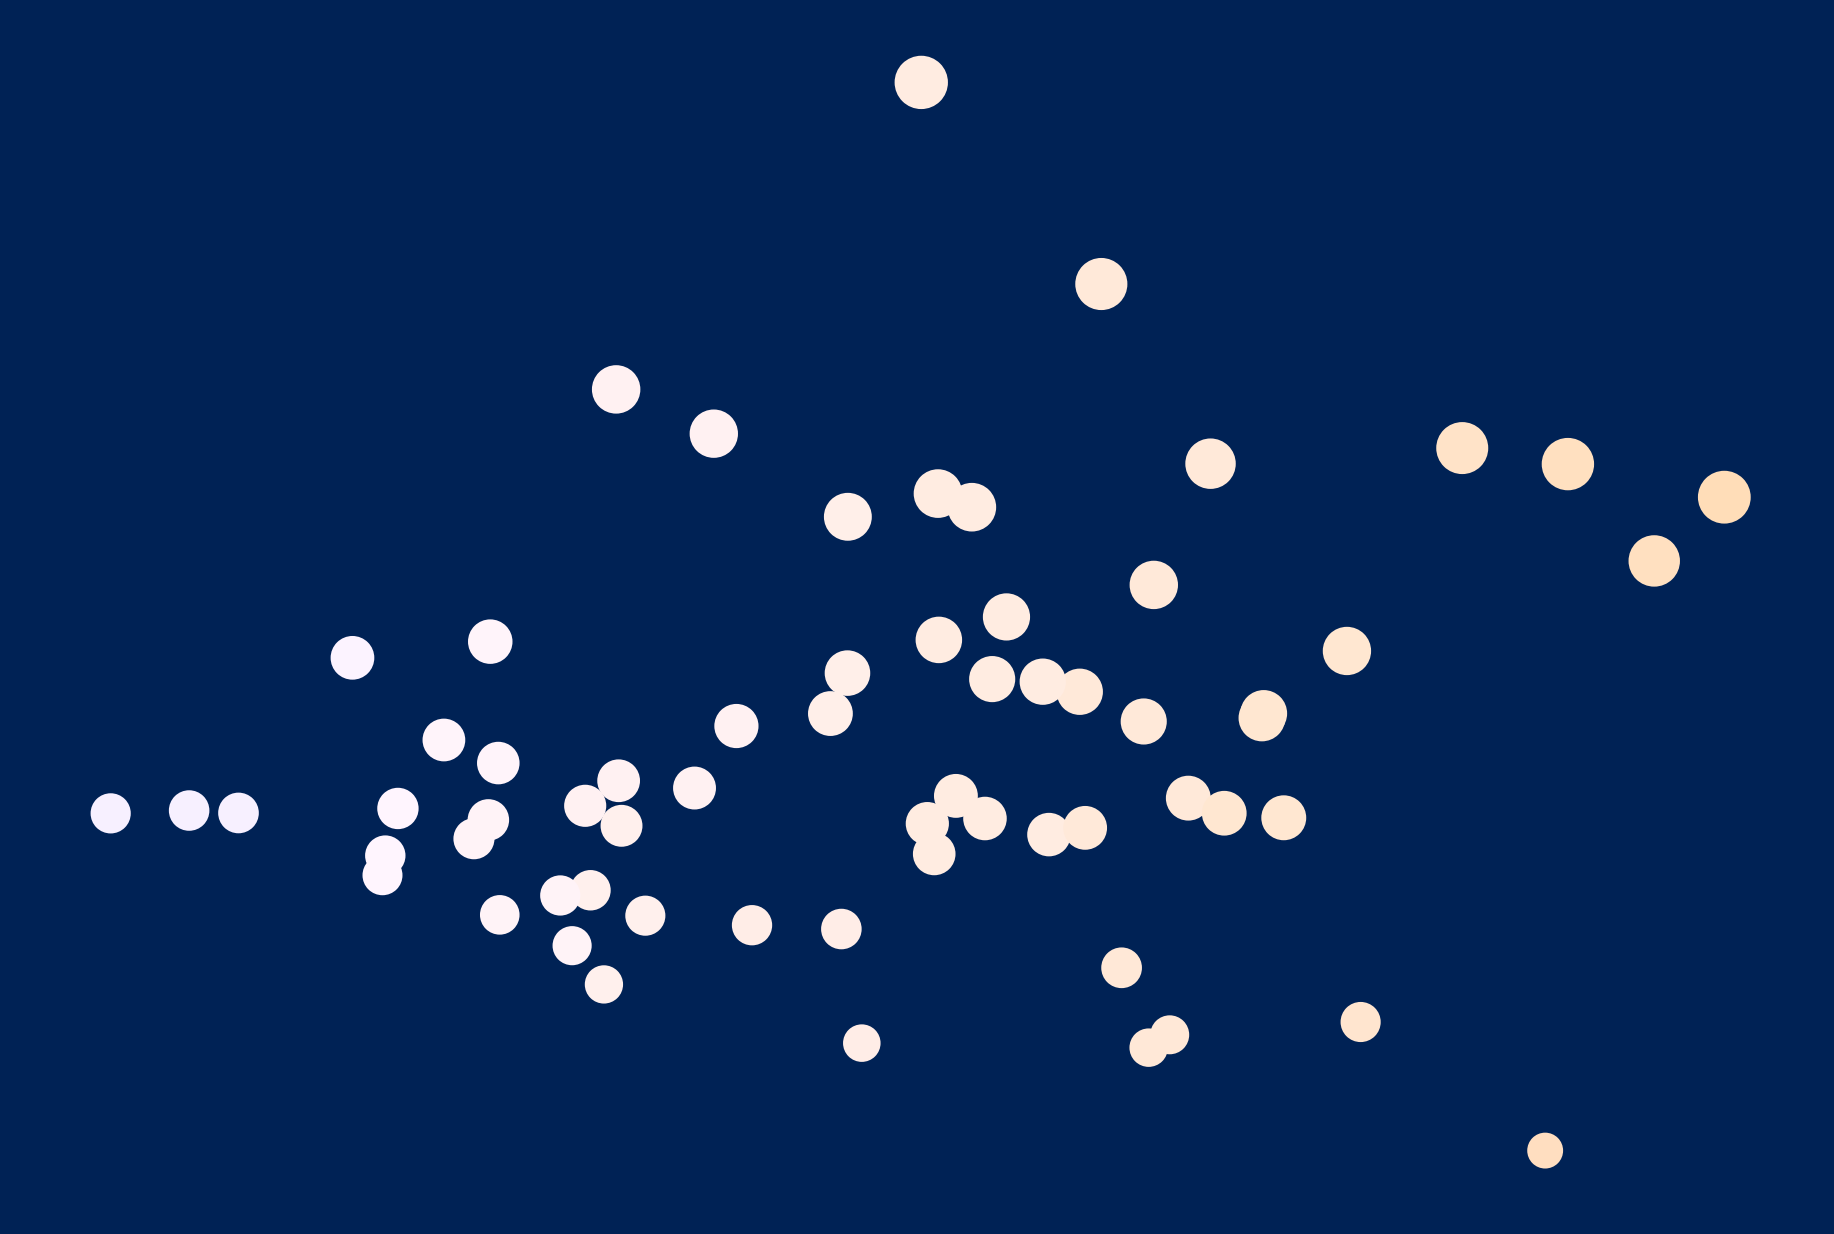

In [127]:
s = 64
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['teff_50th'], df['lum_50th'], c=df[rgb_cols].to_numpy(), s=df['rad_50th']*s)
ax.invert_xaxis()
ax.grid(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([]);